# Project: Creating a Stock Dashboard

## Analyzing Stocks with Python and xlwings

In [1]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data 
import seaborn as sns
from statsmodels.formula.api import ols
plt.style.use("seaborn")

In [4]:
wb = xw.Book("Stocks.xlsx")

In [5]:
db_s = wb.sheets[0]
prices_s = wb.sheets[1]

In [6]:
symbol = db_s.range("C7").value
start = db_s.range("F7").value
end = db_s.range("I7").value
benchmark = db_s.range("K20").value
freq = db_s.range("K39").value

In [7]:
print(symbol, start, end, benchmark, freq, sep = "|")

MSFT|2020-01-01 00:00:00|2020-06-30 00:00:00|^DJI|D


In [8]:
df = data.DataReader(name = [symbol, benchmark], data_source = "yahoo", start = start, end = end).Close
df

Symbols,MSFT,^DJI
Date,,
2019-12-31,157.699997,28538.439453
2020-01-02,160.619995,28868.800781
2020-01-03,158.619995,28634.880859
2020-01-06,159.029999,28703.380859
2020-01-07,157.580002,28583.679688
...,...,...
2020-06-24,197.839996,25445.939453
2020-06-25,200.339996,25745.599609
2020-06-26,196.330002,25015.550781


In [9]:
df.rename(columns = {benchmark:benchmark.replace("^", "")}, inplace = True)

In [10]:
df

Symbols,MSFT,DJI
Date,,
2019-12-31,157.699997,28538.439453
2020-01-02,160.619995,28868.800781
2020-01-03,158.619995,28634.880859
2020-01-06,159.029999,28703.380859
2020-01-07,157.580002,28583.679688
...,...,...
2020-06-24,197.839996,25445.939453
2020-06-25,200.339996,25745.599609
2020-06-26,196.330002,25015.550781


In [11]:
benchmark = benchmark.replace("^", "")
benchmark

'DJI'

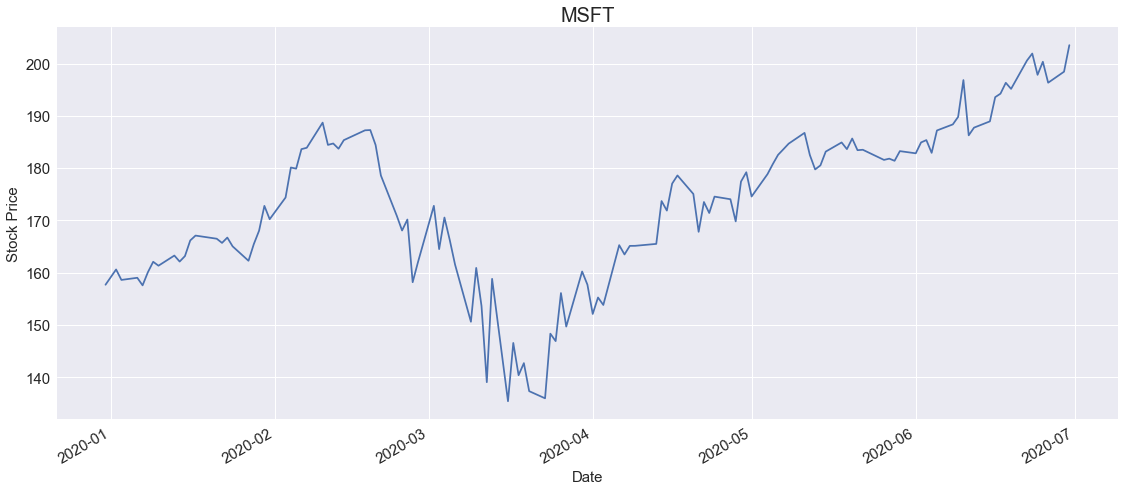

In [12]:
chart = plt.figure(figsize = (19, 8))
df[symbol].plot(fontsize = 15)
plt.title(symbol, fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Stock Price", fontsize = 15)
plt.show()

In [13]:
db_s.pictures.add(chart, name = "Chart", update = True, 
                   left = db_s.range("C8").left, 
                   top = db_s.range("C8").top,
                   scale = 0.47)

<Picture 'Chart' in <Sheet [Stocks.xlsx]Dashboard>>

In [14]:
first = df.iloc[0,0]
first

157.6999969482422

In [15]:
high = df.iloc[:, 0].max()
high

203.50999450683594

In [16]:
low = df.iloc[:, 0].min()
low

135.4199981689453

In [17]:
last = df.iloc[-1, 0]
last

203.50999450683594

In [18]:
total_change = last / first - 1
total_change

0.29048825900503217

In [19]:
db_s.range("H12").options(transpose = True).value = [first, high, low, last, total_change]

In [20]:
norm = df.div(df.iloc[0]).mul(100)
norm

Symbols,MSFT,DJI
Date,,
2019-12-31,100.000000,100.000000
2020-01-02,101.851616,101.157601
2020-01-03,100.583385,100.337935
2020-01-06,100.843375,100.577962
2020-01-07,99.923909,100.158524
...,...,...
2020-06-24,125.453393,89.163738
2020-06-25,127.038681,90.213761
2020-06-26,124.495882,87.655637


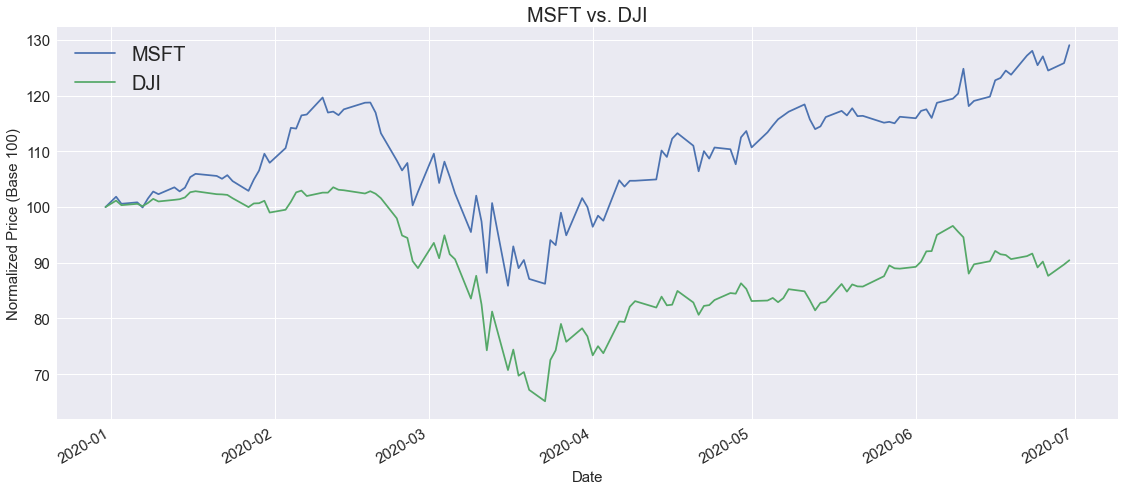

In [21]:
chart2 = plt.figure(figsize = (19, 8))
norm[symbol].plot(fontsize = 15)
norm[benchmark].plot(fontsize = 15)
plt.title(symbol + " vs. " + benchmark, fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Normalized Price (Base 100)", fontsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [22]:
db_s.pictures.add(chart2, name = "Chart2", update = True, 
                   left = db_s.range("C21").left, 
                   top = db_s.range("C21").top + 10,
                   scale = 0.46)

<Picture 'Chart2' in <Sheet [Stocks.xlsx]Dashboard>>

In [23]:
ret  = df.resample(freq).last().dropna().pct_change().dropna()
ret

Symbols,MSFT,DJI
Date,,
2020-01-02,0.018516,0.011576
2020-01-03,-0.012452,-0.008103
2020-01-06,0.002585,0.002392
2020-01-07,-0.009118,-0.004170
2020-01-08,0.015928,0.005647
...,...,...
2020-06-24,-0.020158,-0.027151
2020-06-25,0.012636,0.011776
2020-06-26,-0.020016,-0.028356


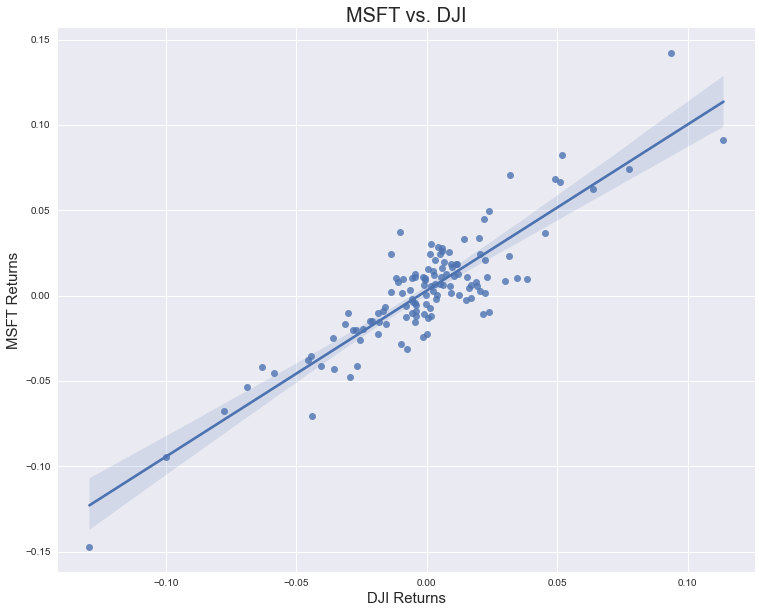

In [24]:
chart3 = plt.figure(figsize = (12.5, 10))
sns.regplot(data = ret, x = benchmark, y = symbol)
plt.title(symbol + " vs. " + benchmark, fontsize = 20)
plt.xlabel(benchmark + " Returns", fontsize = 15)
plt.ylabel(symbol + " Returns", fontsize = 15)
plt.show()

In [25]:
db_s.pictures.add(chart3, name = "Chart3", update = True, 
                   left = db_s.range("C40").left, 
                   top = db_s.range("C40").top,
                   scale = 0.47)

<Picture 'Chart3' in <Sheet [Stocks.xlsx]Dashboard>>

In [26]:
model = ols(symbol + "~" + benchmark, data = ret)

In [27]:
results = model.fit()

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     453.6
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           4.41e-43
Time:                        14:23:11   Log-Likelihood:                 341.17
No. Observations:                 125   AIC:                            -678.3
Df Residuals:                     123   BIC:                            -672.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0029      0.001      2.060      0.0

In [29]:
obs = len(ret)
corr_coef = ret.corr().iloc[0,1]
beta = results.params[1]
r_sq = results.rsquared
t_stat = results.tvalues[1]
p_value = results.pvalues[1]
conf_left = results.conf_int().iloc[1,0]
conf_right = results.conf_int().iloc[1,1]
interc = results.params[0]

In [30]:
regr_list = [obs, corr_coef, beta, r_sq, t_stat, p_value, conf_left, conf_right, interc]

In [31]:
regr_list

[125,
 0.8869400584899384,
 0.9737012837183792,
 0.7866626673541365,
 21.296753074441423,
 4.414537546502161e-43,
 0.8832000706013089,
 1.0642024968354495,
 0.0029333909911830325]

In [32]:
db_s.range("K41").options(transpose = True).value = regr_list

In [33]:
prices_s.range("A1").expand().clear_contents()
prices_s.range("A1").value = df